In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import rlway.osrd.infra as infr

In [49]:
infra, sim, res = infr.read_jsons_in_dir('.')

In [50]:
from rlway.schedules import Schedule
from rlway.schedule_from_osrd import schedule_from_simulation

In [51]:
s = schedule_from_simulation(infra, res, simplify_route_names=False, remove_bufferstop_to_bufferstop=True)
# s.draw_graph()

In [52]:
routes_switches = {
    route['id']: list(route['switches_directions'].keys())[0]
    for route in infra['routes']
    if len(list(route['switches_directions'].keys())) != 0
}
routes_switches

{'rt.DA1->DA_out': 'CVG',
 'rt.DA2->DA_out': 'CVG',
 'rt.DB_in->DB2': 'DVG',
 'rt.DB_in->DB1': 'DVG'}

In [53]:
s

                             0                 1         
                             s        e        s        e
CVG                     24.946   32.122   24.946   32.122
rt.buffer_stop.0->DA1      0.0   26.352      NaN      NaN
rt.buffer_stop.1->DA2      NaN      NaN      0.0   26.352
rt.DA_out->DB_in        30.975  554.183   30.975  554.183
DVG                    553.308  557.911  553.308  557.911
rt.DB1->buffer_stop.2  556.941  592.366      NaN      NaN
rt.DB2->buffer_stop.3      NaN      NaN  556.941  592.366

<Axes: xlabel='Time', ylabel='Track sections'>

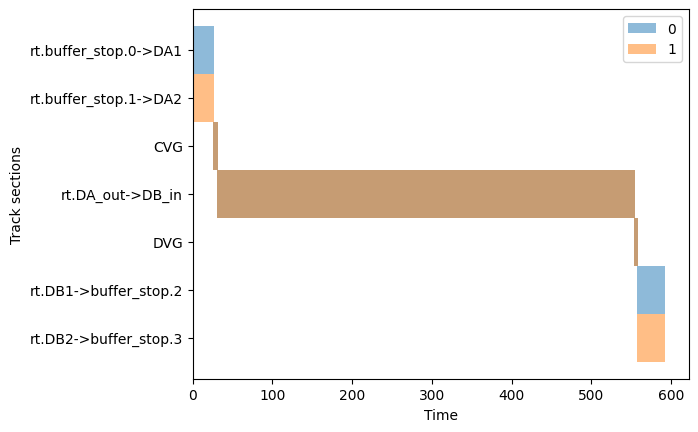

In [54]:
s.sort().plot()

In [55]:
infr.draw_infra(infra)

In [56]:
infr.draw_infra(infra, remove_bufferstop_to_bufferstop=False)

<Axes: xlabel='Time', ylabel='Track sections'>

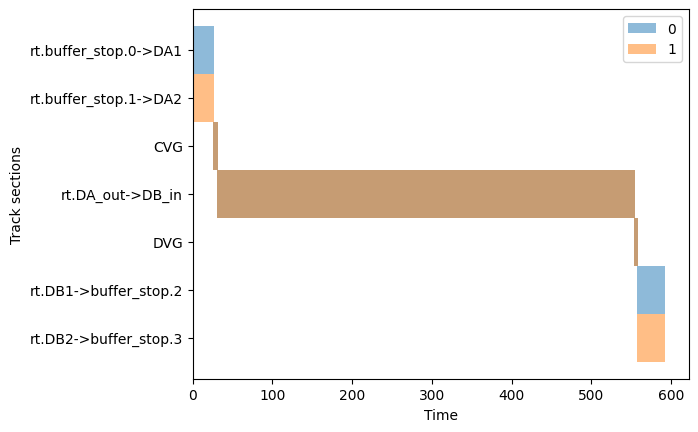

In [57]:
s.sort().plot()